In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import parser

In [347]:
df = pd.read_excel('Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Target variable to predict is the flight price

In [348]:
df['DateTime'] = df['Date_of_Journey'].apply(parser.parse)
#Add features for month day and day of week
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['day_of_week'] = df['DateTime'].dt.day_of_week


df['dep_hour'] = df['Dep_Time'].apply(lambda x: x.split(':')[0])
df['dep_mins'] = df['Dep_Time'].apply(lambda x: x.split(':')[1])

df['arrival_hour'] = df['Arrival_Time'].apply(lambda x: x.split()[0].split(':')[0])
df['arrival_mins'] = df['Arrival_Time'].apply(lambda x: x.split()[0].split(':')[1])
df['overnight'] = df['Arrival_Time'].apply(lambda x: 1 if len(x.split()) != 1 else 0)

def duration_to_mins(s: str):
    hours = 0
    if 'h' in s:
        hours = int(s.split('h')[0])
    mins = 0
    if 'm' in s:
        mins = int(s.split('m')[0][-2:])
    return 60*hours + mins

df['duration'] = df['Duration'].apply(duration_to_mins)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,DateTime,month,day,day_of_week,dep_hour,dep_mins,arrival_hour,arrival_mins,overnight,duration
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,2019-03-24,3,24,6,22,20,01,10,1,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,2019-01-05,1,5,5,05,50,13,15,0,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,2019-09-06,9,6,4,09,25,04,25,1,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,2019-12-05,12,5,3,18,05,23,30,0,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,2019-01-03,1,3,3,16,50,21,35,0,285


In [349]:
# categorical wrangling
source = pd.get_dummies(df[['Source']], drop_first=True)
destination = pd.get_dummies(df[['Destination']], drop_first=True)
airline = pd.get_dummies(df[['Airline']], drop_first=True)
df = pd.concat([df, source, destination, airline], axis=1)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,0,1,0,0,0,0,0,0,0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,0,1,0,0,0,0,0,0,0,0


In [350]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [351]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,...,0,1,0,0,0,0,0,0,0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0.0,No info,...,0,0,0,0,0,0,0,0,0,0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0.0,No info,...,0,0,0,0,0,0,0,0,0,0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0.0,No info,...,0,0,1,0,0,0,0,0,0,0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,...,0,0,0,0,0,0,0,0,1,0


In [352]:
# Thought about geocoding the location but seemed unnecessary 
# import requests
# search_text = 'Mountain View, CA'
# url = f'https://api.mapbox.com/geocoding/v5/mapbox.places/{search_text}.json'
# r = requests.get(url)
# results = r.json()
# print(results)

In [353]:
df.drop(columns=['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Route',
 'Additional_Info','Airline', 'Source', 'Destination'], inplace=True)
df_train = df
df_train

,Total_Stops,Price,DateTime,month,day,day_of_week,dep_hour,dep_mins,arrival_hour,arrival_mins,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0.0,3897,2019-03-24,3,24,6,22,20,01,10,...,0,1,0,0,0,0,0,0,0,0
1,2.0,7662,2019-01-05,1,5,5,05,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,2.0,13882,2019-09-06,9,6,4,09,25,04,25,...,0,0,1,0,0,0,0,0,0,0
3,1.0,6218,2019-12-05,12,5,3,18,05,23,30,...,0,1,0,0,0,0,0,0,0,0
4,1.0,13302,2019-01-03,1,3,3,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,2019-09-04,9,4,2,19,55,22,25,...,0,0,0,0,0,0,0,0,0,0
10679,0.0,4145,2019-04-27,4,27,5,20,45,23,20,...,0,0,0,0,0,0,0,0,0,0
10680,0.0,7229,2019-04-27,4,27,5,08,20,11,20,...,0,0,1,0,0,0,0,0,0,0
10681,0.0,12648,2019-01-03,1,3,3,11,30,14,10,...,0,0,0,0,0,0,0,0,1,0


In [354]:
def process_df(df):
    df['DateTime'] = df['Date_of_Journey'].apply(parser.parse)
    #Add features for month day and day of week
    df['month'] = df['DateTime'].dt.month
    df['day'] = df['DateTime'].dt.day
    df['day_of_week'] = df['DateTime'].dt.day_of_week


    df['dep_hour'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[0]))
    df['dep_mins'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[1]))

    df['arrival_hour'] = df['Arrival_Time'].apply(lambda x: int(x.split()[0].split(':')[0]))
    df['arrival_mins'] = df['Arrival_Time'].apply(lambda x: int(x.split()[0].split(':')[1]))
    df['overnight'] = df['Arrival_Time'].apply(lambda x: 1 if len(x.split()) != 1 else 0)
    df['duration'] = df['Duration'].apply(duration_to_mins)


    # categorical wrangling
    source = pd.get_dummies(df[['Source']], drop_first=True)
    destination = pd.get_dummies(df[['Destination']], drop_first=True)
    airline = pd.get_dummies(df[['Airline']], drop_first=True)
    df = pd.concat([df, source, destination, airline], axis=1)

    df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})
    df.drop(columns=['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Route',
    'Additional_Info','Airline', 'Source', 'Destination', 'DateTime'], inplace=True)

    return df

df_test = process_df(pd.read_excel('Flight_Ticket_Participant_Datasets/Test_set.xlsx'))
df_train = process_df(pd.read_excel('Flight_Ticket_Participant_Datasets/Data_Train.xlsx'))
df_train = df_train.dropna(axis=0)
df_test.head()

,Total_Stops,month,day,day_of_week,dep_hour,dep_mins,arrival_hour,arrival_mins,overnight,duration,...,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,1,6,6,3,17,30,4,25,1,655,...,0,0,0,1,0,0,0,0,0,0
1,1,12,5,3,6,20,10,20,0,240,...,0,0,1,0,0,0,0,0,0,0
2,1,5,21,1,19,15,19,0,1,1425,...,0,0,0,1,0,0,0,0,0,0
3,1,5,21,1,8,0,21,0,0,780,...,0,0,0,0,0,1,0,0,0,0
4,0,6,24,0,23,55,2,45,1,170,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

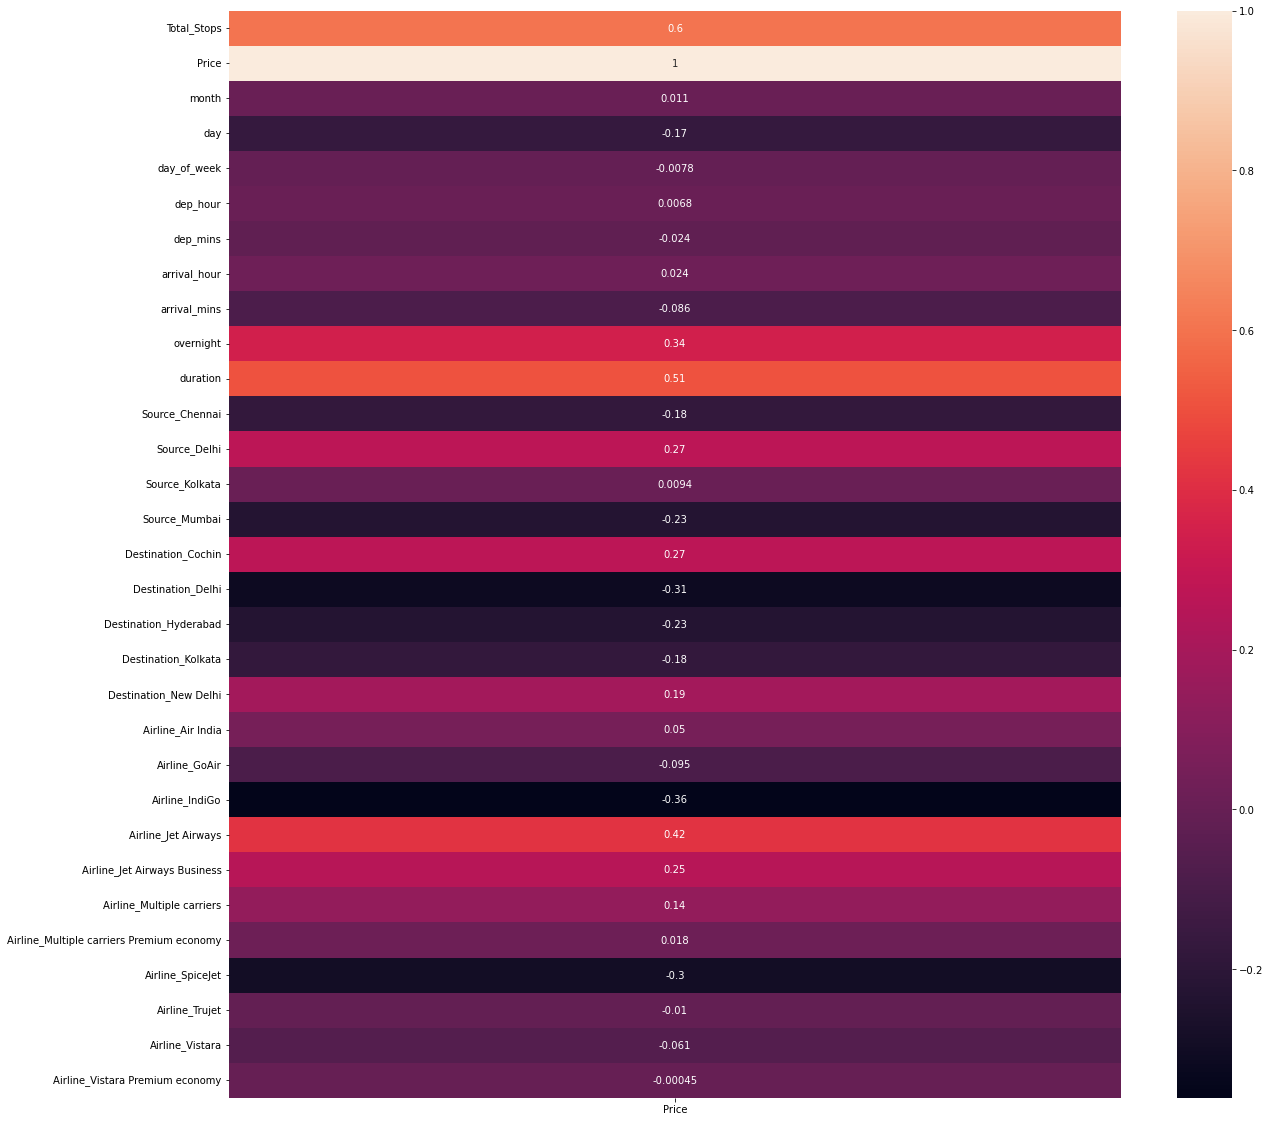

In [355]:
X = df_train.drop(columns='Price')
y = df_train['Price']
plt.figure(figsize = [20, 20])
sns.heatmap(df_train.corr()[['Price']], annot=True)

In [356]:
df_train[['Total_Stops']].isnull().value_counts()
df_train.loc[df_train['Total_Stops'].isnull() == True]

,Total_Stops,Price,month,day,day_of_week,dep_hour,dep_mins,arrival_hour,arrival_mins,overnight,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy


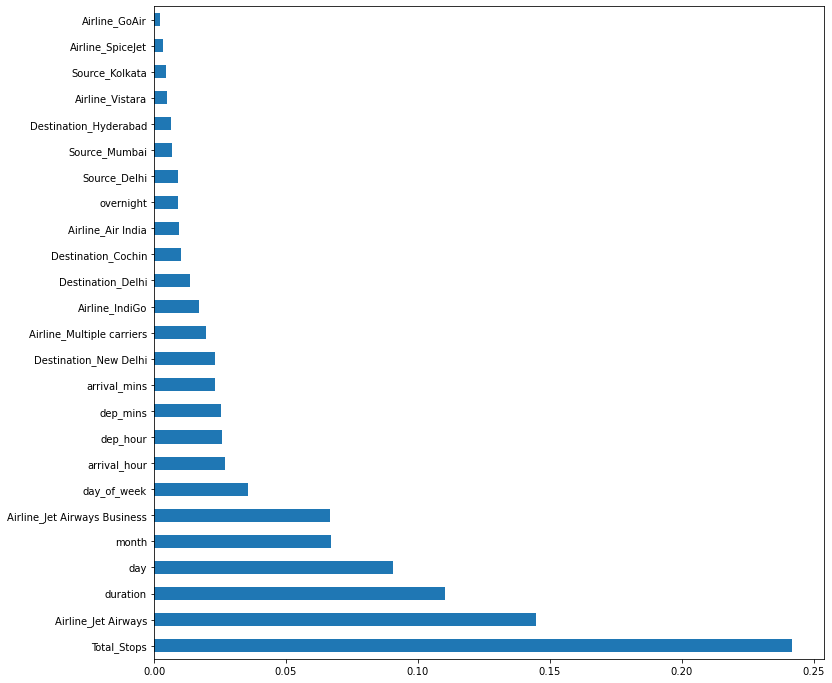

In [357]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
plt.figure(figsize=(12,12))
feature_importances = pd.Series(selection.feature_importances_, index = X.columns)
feature_importances.nlargest(25).plot(kind='barh')
plt.show()

In [358]:
# Random Forest Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

randforest_reg = RandomForestRegressor()
randforest_reg.fit(X_train, y_train)
y_pred = randforest_reg.predict(X_test)
randforest_reg.score(X_train, y_train)


0.955081605939504

In [359]:
randforest_reg.score(X_test, y_test)

0.7882419016716778

In [360]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features=['auto','sqrt']
# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
# Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10],
 'bootstrap': [True, False]}

In [361]:
rf_random = RandomizedSearchCV(estimator=randforest_reg, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=  11.0s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=  11.1s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   5.8s
[CV] END bootstrap=False, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  13.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  25.6s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  26.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30

/home/jon/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900; total time=   5.9s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900; total time=   5.9s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=900; total time=   6.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   7.9s
[CV] END bootstrap=False, max_depth=10, max_f

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': True}

In [362]:
from sklearn import metrics

prediction = rf_random.predict(X_test)
print(metrics.r2_score(y_test,prediction))

0.8087330488286478


In [364]:
df_test['Airline_Trujet'] = 0
test_prediction = rf_random.predict(df_test)
test_prediction

/home/jon/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([11714.65576159,  4352.31530038, 14505.78371938, ...,
       15121.52524108, 13142.59180955,  7849.56859401])

In [365]:
submission_df = pd.DataFrame({'Price': test_prediction})
submission_df.to_csv('submission.csv', index=False)
s=pd.read_csv('submission.csv')
s.head()

,Price
0,11714.655762
1,4352.315300
2,14505.783719
3,10687.080179
4,3777.271286


In [367]:
from sklearn import svm
regr = svm.SVR(kernel='rbf')
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.14388819505895112

In [370]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=5000, warm_start= True)


In [373]:
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.687765164437439

In [ ]:
from sklearn import pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('regression', RandomForestRegressor())
])
clf.fit(X_train, y_train)